# Computing the centroid of a polygon

## Introduction

The centroid of a polygon is the arithmetic mean of all the points in the surface of the figure. If we have a polygon $V_p$, then the centroid $\mathbf{r}_{centroid}$ has the property that
$$\int_{V_p} (x - \mathbf{r}_{centroid}) dV = 0.$$

## Computing the centroid

We consider a polygon, such as shown below:

<img src="figs/centroids/geometry.png" width="320" height="240">

The midpoint $\mathbf{r}_{mid}$ of this polygon is given by the formula
$$ \mathbf{r}_{mid} = \frac{1}{N_{nodes}} \sum_{i=1}^{N_{nodes}} \mathbf{r}_{n_i}.$$
<img src="figs/centroids/mid_point.png" width="320" height="240"/>
This midpoint is in general not the same as the centroid, except for the case when the polygon is a triangle.
If the polygon is not a triangle, it can be subdivided into a set of triangles.
<img src="figs/centroids/triangulation.png" width="320" height="240">
The centroids of each of these triangles can be computed, and along with the area weights of each triangle, the centroid of the original polygon can be computed.
The signed area of a triangle is given by the formula
$$A_{tri}= \frac{(\mathbf{r}_{2} - \mathbf{r}_{1})\times(\mathbf{r}_3-\mathbf{r}_1)}{2}$$,
where $\mathbf{r}_i$ are the vertices of the triangle.
The midpoint of the triangle, which is also the the centroid, is given by
$$ \mathbf{r}_{tri,mid} = \mathbf{r}_{tri,centroid} = \frac{1}{3} (\mathbf{r}_{1} + \mathbf{r}_{2} + \mathbf{r}_{3}).$$
If we now let $\mathbf{r}_{mid}$ be the midpoint of our general polygon, then the centroid is given by the formula
$$ \mathbf{r}_{centroid} = \frac{1}{|A_f|} \sum_{i=1}^{N_{nodes}} |A_{tri}|(\mathbf{r}_{n_i} + \mathbf{r}_{n_{i+1}} + \mathbf{r}_{mid}),$$
where
$$A_f = \sum_{i=1}^{N_{nodes}} A_{tri},$$
and the convention is used that $\mathbf{r}_{n_{N_{nodes} + 1}} = \mathbf{r}_{n_1}$.


# Example polygons

In [26]:
import sys
sys.path.append('../')

from gradient_reconstruction.util import *
import numpy as np
import matplotlib.pyplot as plt

## Triangle

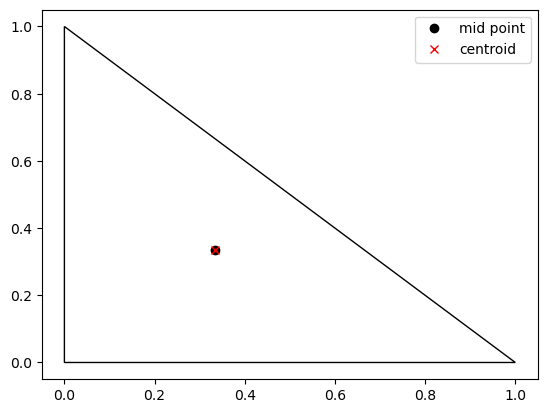

In [29]:
nodes = np.asarray([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])
cells = np.asarray([[0,1,2]])
mid_points = mesh_util.compute_cell_midpoints(nodes, cells)
centroids = mesh_util.compute_cell_centroids(nodes, cells)

mesh_plotter.plot_points(mid_points)
mesh_plotter.plot_points(centroids, format = 'x', color = 'red')
mesh_plotter.plot_mesh(nodes, cells)
plt.legend(["Mid point", "Centroid"])

## Rectangle

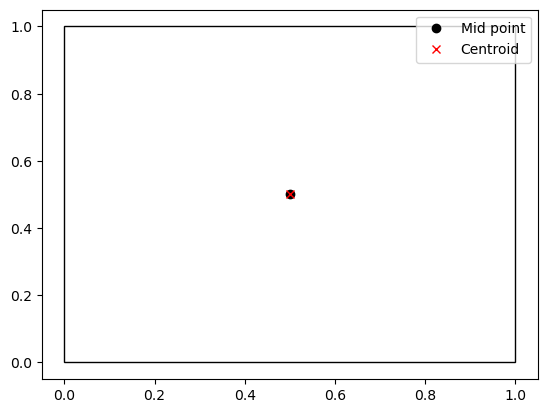

In [31]:
nodes = np.asarray([[0.0, 0.0], [1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])
cells = np.asarray([[0,1,2,3]])
mid_points = mesh_util.compute_cell_midpoints(nodes, cells)
centroids = mesh_util.compute_cell_centroids(nodes, cells)

mesh_plotter.plot_points(mid_points)
mesh_plotter.plot_points(centroids, format = 'x', color = 'red')
mesh_plotter.plot_mesh(nodes, cells)
plt.legend(["Mid point", "Centroid"])

## Skewed Rectangle

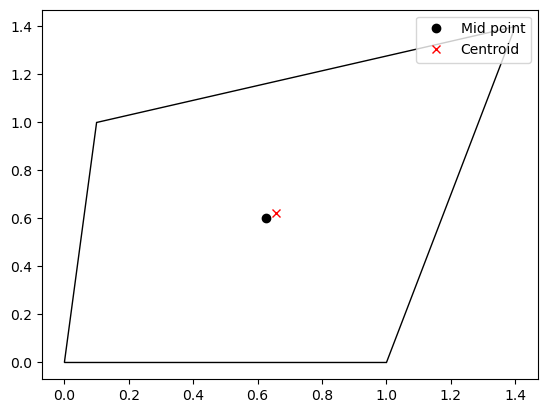

In [35]:
nodes = np.asarray([[0.0, 0.0], [1.0, 0.0], [1.4, 1.4], [0.1, 1.0]])
cells = np.asarray([[0,1,2,3]])
mid_points = mesh_util.compute_cell_midpoints(nodes, cells)
centroids = mesh_util.compute_cell_centroids(nodes, cells)

mesh_plotter.plot_points(mid_points)
mesh_plotter.plot_points(centroids, format = 'x', color = 'red')
mesh_plotter.plot_mesh(nodes, cells)
plt.legend(["Mid point", "Centroid"])